In [77]:
import pandas as pd
import os
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

In [78]:
df = pd.read_csv("channel_spend_graduate.csv")

In [79]:
data_original = pd.read_csv("subscribers.csv")

/Users/wan/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [80]:
data = data_original[:]

In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218778 entries, 0 to 218777
Data columns (total 31 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Unnamed: 0                    218778 non-null  int64  
 1   subid                         218778 non-null  int64  
 2   package_type                  183628 non-null  object 
 3   num_weekly_services_utilized  112599 non-null  float64
 4   preferred_genre               182871 non-null  object 
 5   intended_use                  215665 non-null  object 
 6   weekly_consumption_hour       182561 non-null  float64
 7   num_ideal_streaming_services  111141 non-null  float64
 8   age                           184880 non-null  float64
 9   male_TF                       218574 non-null  object 
 10  country                       218778 non-null  object 
 11  attribution_technical         218778 non-null  object 
 12  attribution_survey            216575 non-nul

In [82]:
del data['language']

In [83]:
del data['months_per_bill_period']

In [84]:
del data['country']

In [85]:
del data['last_payment']

In [86]:
del data['next_payment']

In [87]:
del data['payment_type']

In [88]:
del data['plan_type']

In [89]:
del data["account_creation_date"]

In [90]:
del data["trial_end_date"]

In [91]:
del data["Unnamed: 0"]

In [92]:
del data['subid']

In [93]:
del data['attribution_technical']

In [94]:
del data['attribution_survey']

In [95]:
del data['monthly_price']

In [96]:
data['cancel_TF'] = False

<ipython-input-96-f9824bcb5876>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cancel_TF'] = False


In [97]:
data.loc[data['cancel_date'].notnull(),'cancel_TF'] = True

/Users/wan/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [98]:
data['cancel_TF'].describe()

count     218778
unique         2
top        False
freq      182842
Name: cancel_TF, dtype: object

In [99]:
del data['cancel_date']

In [100]:
data.drop(data[data['age'] >100].index,inplace=True)

/Users/wan/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [101]:
data["num_weekly_services_utilized"].describe()

count    112183.000000
mean          3.006587
std           0.820060
min           0.000000
25%           2.000000
50%           3.000000
75%           3.000000
max          14.000000
Name: num_weekly_services_utilized, dtype: float64

In [102]:
data.loc[data['num_weekly_services_utilized'].isnull(),'num_weekly_services_utilized']= 3

In [103]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 217890 entries, 0 to 218777
Data columns (total 17 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   package_type                  182919 non-null  object 
 1   num_weekly_services_utilized  217890 non-null  float64
 2   preferred_genre               182168 non-null  object 
 3   intended_use                  214790 non-null  object 
 4   weekly_consumption_hour       181679 non-null  float64
 5   num_ideal_streaming_services  110729 non-null  float64
 6   age                           183992 non-null  float64
 7   male_TF                       217686 non-null  object 
 8   op_sys                        205277 non-null  object 
 9   discount_price                217890 non-null  float64
 10  initial_credit_card_declined  217890 non-null  bool   
 11  join_fee                      184195 non-null  float64
 12  num_trial_days                217890 non-nul

In [104]:
data.drop(data[data['weekly_consumption_hour'] <0].index,inplace=True)

In [105]:
data.loc[data['weekly_consumption_hour'].isnull(),'weekly_consumption_hour']= 28

In [106]:
data.drop(data[data['num_ideal_streaming_services'] <0].index,inplace=True)

In [107]:
data.loc[data['num_ideal_streaming_services'].isnull(),'num_ideal_streaming_services']= 2

In [108]:
data.loc[data['age'].isnull(),'age']= 46

In [109]:
data.loc[data['age']<30,'age_range']= "young"
data.loc[(data['age']>30) & (data['age']<60),'age_range']= "middle-aged"
data.loc[data['age']>60,'age_range']= "old"

/Users/wan/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)


In [110]:
data.loc[data['join_fee'].isnull(),'join_fee']= 0

In [111]:
data = data.dropna()

In [112]:
dummies = pd.get_dummies(data['package_type'])
data = pd.concat([data, dummies], axis=1)
data = data.drop(['package_type'], axis=1)

In [113]:
dummies = pd.get_dummies(data['preferred_genre'])
data = pd.concat([data, dummies], axis=1)
data = data.drop(['preferred_genre'], axis=1)

In [114]:
dummies = pd.get_dummies(data['intended_use'])
data = pd.concat([data, dummies], axis=1)
data = data.drop(['intended_use'], axis=1)

In [115]:
data = data.drop(['age'], axis=1)

In [116]:
dummies = pd.get_dummies(data['op_sys'])
data = pd.concat([data, dummies], axis=1)
data = data.drop(['op_sys'], axis=1)

In [117]:
dummies = pd.get_dummies(data['age_range'])
data = pd.concat([data, dummies], axis=1)
data = data.drop(['age_range'], axis=1)

In [118]:
data.loc[data['num_trial_days']==0,'num_trial_days']=0
data.loc[data['num_trial_days']==14,'num_trial_days']=1
data.loc[data['male_TF']==True,'male_TF']=1
data.loc[data['male_TF']==False,'male_TF']=0

In [119]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 165790 entries, 0 to 218771
Data columns (total 32 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   num_weekly_services_utilized  165790 non-null  float64
 1   weekly_consumption_hour       165790 non-null  float64
 2   num_ideal_streaming_services  165790 non-null  float64
 3   male_TF                       165790 non-null  object 
 4   discount_price                165790 non-null  float64
 5   initial_credit_card_declined  165790 non-null  bool   
 6   join_fee                      165790 non-null  float64
 7   num_trial_days                165790 non-null  int64  
 8   current_sub_TF                165790 non-null  bool   
 9   payment_period                165790 non-null  int64  
 10  trial_completed               165790 non-null  bool   
 11  cancel_TF                     165790 non-null  bool   
 12  base                          165790 non-nul

# clustering

In [120]:
data_00 = data[:]

In [121]:
del data_00['cancel_TF']

In [122]:
del data_00['trial_completed']

In [123]:
del data_00['current_sub_TF']

In [124]:
data_00.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 165790 entries, 0 to 218771
Data columns (total 29 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   num_weekly_services_utilized  165790 non-null  float64
 1   weekly_consumption_hour       165790 non-null  float64
 2   num_ideal_streaming_services  165790 non-null  float64
 3   male_TF                       165790 non-null  object 
 4   discount_price                165790 non-null  float64
 5   initial_credit_card_declined  165790 non-null  bool   
 6   join_fee                      165790 non-null  float64
 7   num_trial_days                165790 non-null  int64  
 8   payment_period                165790 non-null  int64  
 9   base                          165790 non-null  uint8  
 10  economy                       165790 non-null  uint8  
 11  enhanced                      165790 non-null  uint8  
 12  comedy                        165790 non-nul

In [125]:
if 0==1:
    scaler = MinMaxScaler()
    scaler.fit(data_00)
    # transform
    data_scaled = pd.DataFrame(scaler.transform(data_00),columns=data_00.columns)

    # KMeans
    # choose k value with elbow method
    K = range(1, 8)
    meanDispersions = []
    for k in K:
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data_00)
        meanDispersions.append(sum(np.min(cdist(data_00, kmeans.cluster_centers_, 'euclidean'), axis=1)) / data_00.shape[0])

    plt.plot(K, meanDispersions, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Average Dispersion')
    plt.title('Selecting k with the Elbow Method')
    plt.show()

In [126]:
kmeans = KMeans(n_clusters=3).fit(data_00)
data['type']=kmeans.labels_
data['type'].unique()

array([0, 1, 2], dtype=int32)

In [127]:
data_00

,num_weekly_services_utilized,weekly_consumption_hour,num_ideal_streaming_services,male_TF,discount_price,initial_credit_card_declined,join_fee,num_trial_days,payment_period,base,...,expand international access,expand regional access,other,replace OTT,supplement OTT,Android,iOS,middle-aged,old,young
0,3.0,28.751405,2.0,0,4.5141,False,0.3303,1,0,1,...,0,0,0,1,0,0,1,1,0,0
1,3.0,20.051667,2.0,0,4.5141,False,0.0367,1,0,0,...,0,0,0,1,0,1,0,1,0,0
2,3.0,36.001186,2.0,1,4.5141,False,0.3303,1,0,0,...,0,0,0,0,0,1,0,0,1,0
3,3.0,28.751405,2.0,0,4.5141,False,0.3303,1,0,1,...,0,0,0,1,0,0,1,1,0,0
4,3.0,31.651317,2.0,0,4.5141,False,0.3303,1,1,1,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218712,3.0,24.401536,2.0,0,4.5141,False,0.0367,1,3,1,...,0,0,0,0,0,0,1,1,0,0
218728,3.0,24.401536,2.0,0,4.5141,False,0.0000,1,3,0,...,0,0,0,0,0,0,1,0,1,0
218734,3.0,28.751405,2.0,0,4.5141,False,0.0367,1,0,1,...,0,0,0,0,0,0,1,0,1,0
218735,3.0,24.401536,2.0,0,4.5141,False,0.0000,1,0,0,...,0,0,0,0,0,0,1,1,0,0


In [128]:
data.to_csv('clustered.csv')

In [129]:
import seaborn as sns

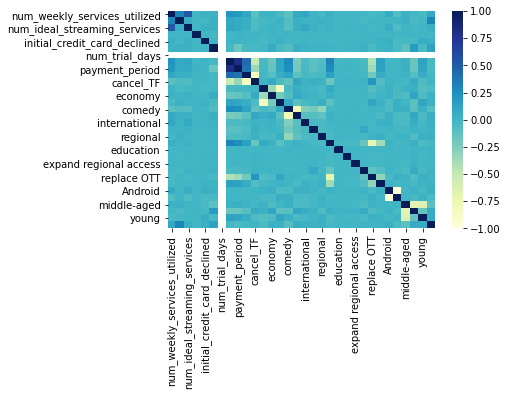

In [130]:
cor=data.corr()
sns.heatmap(cor,annot=False,cmap="YlGnBu")

In [131]:
df = pd.read_csv('clustered.csv')

In [132]:
hehe = df.groupby(['type']).mean()

In [133]:
hehe.to_csv('cluster_mean.csv')

In [134]:
del data['cancel_TF']

In [135]:
del data['trial_completed']

In [136]:
del data['payment_period']

In [137]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 165790 entries, 0 to 218771
Data columns (total 30 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   num_weekly_services_utilized  165790 non-null  float64
 1   weekly_consumption_hour       165790 non-null  float64
 2   num_ideal_streaming_services  165790 non-null  float64
 3   male_TF                       165790 non-null  object 
 4   discount_price                165790 non-null  float64
 5   initial_credit_card_declined  165790 non-null  bool   
 6   join_fee                      165790 non-null  float64
 7   num_trial_days                165790 non-null  int64  
 8   current_sub_TF                165790 non-null  bool   
 9   base                          165790 non-null  uint8  
 10  economy                       165790 non-null  uint8  
 11  enhanced                      165790 non-null  uint8  
 12  comedy                        165790 non-nul

In [138]:
y = data['current_sub_TF']

In [139]:
X = data.drop(['current_sub_TF'], axis=1)

In [140]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=9)

In [141]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

logreg.fit(X_train,y_train)

y_pred=logreg.predict(X_test)

/Users/wan/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [142]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[12492,  5298],
       [ 4249, 27698]])

Text(0.5, 257.44, 'Predicted label')

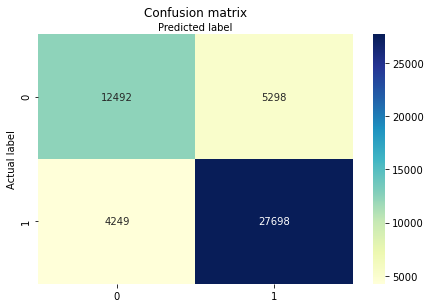

In [143]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [144]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8080503448137202
Precision: 0.8394350830403685
Recall: 0.8669984662096597


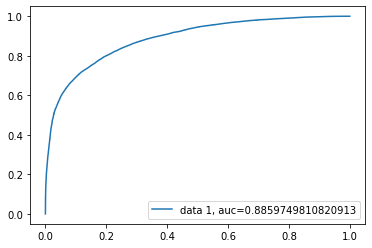

In [145]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [146]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()

gb.fit(X_train, y_train)

y_pred = gb.predict(X_test)

In [147]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8078291814946619
Precision: 0.8357980622131566
Recall: 0.8721632704166276


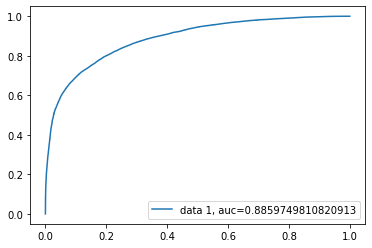

In [148]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

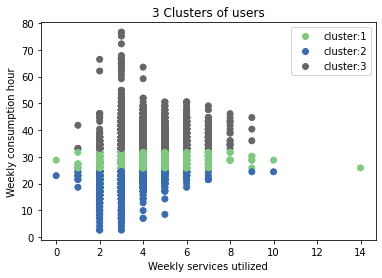

In [149]:
scatter = plt.scatter(data['num_weekly_services_utilized'], data['weekly_consumption_hour'], c=data['type'],cmap='Accent')
plt.legend(handles=scatter.legend_elements()[0], labels=['cluster:1','cluster:2','cluster:3'])
plt.xlabel('Weekly services utilized')
plt.ylabel('Weekly consumption hour')
plt.title('3 Clusters of users')
plt.show()

In [150]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split

In [208]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import ExtraTreesClassifier

In [209]:
trainX = X_train
trainY = y_train

In [210]:
data.columns.values.tolist()

['num_weekly_services_utilized',
 'weekly_consumption_hour',
 'num_ideal_streaming_services',
 'male_TF',
 'discount_price',
 'initial_credit_card_declined',
 'join_fee',
 'num_trial_days',
 'current_sub_TF',
 'base',
 'economy',
 'enhanced',
 'comedy',
 'drama',
 'international',
 'other',
 'regional',
 'access to exclusive content',
 'education',
 'expand international access',
 'expand regional access',
 'other',
 'replace OTT',
 'supplement OTT',
 'Android',
 'iOS',
 'middle-aged',
 'old',
 'young',
 'type']

In [ ]:
predictor = ['num_weekly_services_utilized',
 'weekly_consumption_hour',
 'num_ideal_streaming_services',
 'male_TF',
 'discount_price',
 'initial_credit_card_declined',
 'join_fee',
 'num_trial_days',
 'base',
 'economy',
 'enhanced',
 'comedy',
 'drama',
 'international',
 'other',
 'regional',
 'access to exclusive content',
 'education',
 'expand international access',
 'expand regional access',
 'other',
 'replace OTT',
 'supplement OTT',
 'Android',
 'iOS',
 'middle-aged',
 'old',
 'young',
 'type']

parameters = {
    'n_estimators'      : [320,330,340],
    'max_depth'         : [8, 9, 10, 11, 12],
    'random_state'      : [0],
    #'max_features': ['auto'],
    #'criterion' :['gini']
}

clf = RandomForestClassifier(n_estimators=320)
clf = clf.fit(trainX, trainY)
fti = clf.feature_importances_
for i, feat in enumerate(predictor):
    print('\t{0:20s} : {1:>.6f}'.format(feat, fti[i]))

model = SelectFromModel(clf, prefit=True)
train_new = model.transform(trainX)
#print (train_new.shape)

clf = GridSearchCV(RandomForestClassifier(), parameters, cv=10, n_jobs=-1)
clf.fit(train_new, trainY)

print(clf.best_params_)

	num_weekly_services_utilized : 0.108881
	weekly_consumption_hour : 0.126285
	num_ideal_streaming_services : 0.012476
	male_TF              : 0.020825
	discount_price       : 0.001328
	initial_credit_card_declined : 0.010420
	join_fee             : 0.081742
	num_trial_days       : 0.000000
	base                 : 0.014126
	economy              : 0.031019
	enhanced             : 0.022868
	comedy               : 0.080460
	drama                : 0.039551
	international        : 0.004989
	other                : 0.010708
	regional             : 0.006587
	access to exclusive content : 0.103153
	education            : 0.000312
	expand international access : 0.000571
	expand regional access : 0.000638
	other                : 0.007939
	replace OTT          : 0.181484
	supplement OTT       : 0.038584
	Android              : 0.007566
	iOS                  : 0.007547
	middle-aged          : 0.013208
	old                  : 0.029750
	young                : 0.021940
	type                 : 0.015042
